In [1]:
#libraries
library(GO.db)
library(topGO)
library(org.Sc.sgd.db)
library(GOSemSim)
library(gridExtra)

Loading required package: AnnotationDbi
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

 

In [7]:
file <- "yeast_uetz"

ont <- "BP"
init <- 1

db <- org.Sc.sgd.db
mapping <- "org.Sc.sgd.db"
ID <- "ENSEMBL"

scGO <- godata(mapping, ont=ont, keytype=ID)

[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."


In [12]:
ps <- seq(from = 0.1, to = 0.9, by = 0.1)

In [13]:
ps

[1] 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9

In [14]:
getMeanSimilarity <- function(p) {
    ##load all community gene lists
    setwd(sprintf("/home/david/Documents/ghsom/%s_communities_%s_%s", file, p, init))

    #background gene list
    backgroundFilename <- "all_genes.txt"
    allGenes <- scan(backgroundFilename, character())

    #load communities from file
    g <- list()
    numCom <- 0
    filename <- sprintf("community_%s.txt", numCom)
    while (file.exists(filename)) {
        numCom <- numCom + 1
        g[[numCom]] <- scan(filename, character())
        filename <- sprintf("community_%s.txt", numCom)
    }
    
    clusterSims <- sapply(g, function(i) 
        mean(mgeneSim(genes = i, semData = scGO, measure = "Wang", combine = "BMA", verbose = FALSE)))
    
    return(list(numCom, mean(clusterSims)))
}

In [15]:
results <- sapply(ps, getMeanSimilarity)

In [16]:
results

51,21,13,8,6,6,6,6,6
0.5742647,0.3804392,0.3142126,0.2838531,0.2688475,0.2688475,0.2688475,0.2688475,0.2688475


In [18]:
results[1,]

[[1]]
[1] 51

[[2]]
[1] 21

[[3]]
[1] 13

[[4]]
[1] 8

[[5]]
[1] 6

[[6]]
[1] 6

[[7]]
[1] 6

[[8]]
[1] 6

[[9]]
[1] 6

In [22]:
results[2,]

[[1]]
[1] 0.5742647

[[2]]
[1] 0.3804392

[[3]]
[1] 0.3142126

[[4]]
[1] 0.2838531

[[5]]
[1] 0.2688475

[[6]]
[1] 0.2688475

[[7]]
[1] 0.2688475

[[8]]
[1] 0.2688475

[[9]]
[1] 0.2688475

Warning message in plot.window(...):
“"add" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"add" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"add" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"add" is not a graphical parameter”Warning message in box(...):
“"add" is not a graphical parameter”Warning message in title(...):
“"add" is not a graphical parameter”

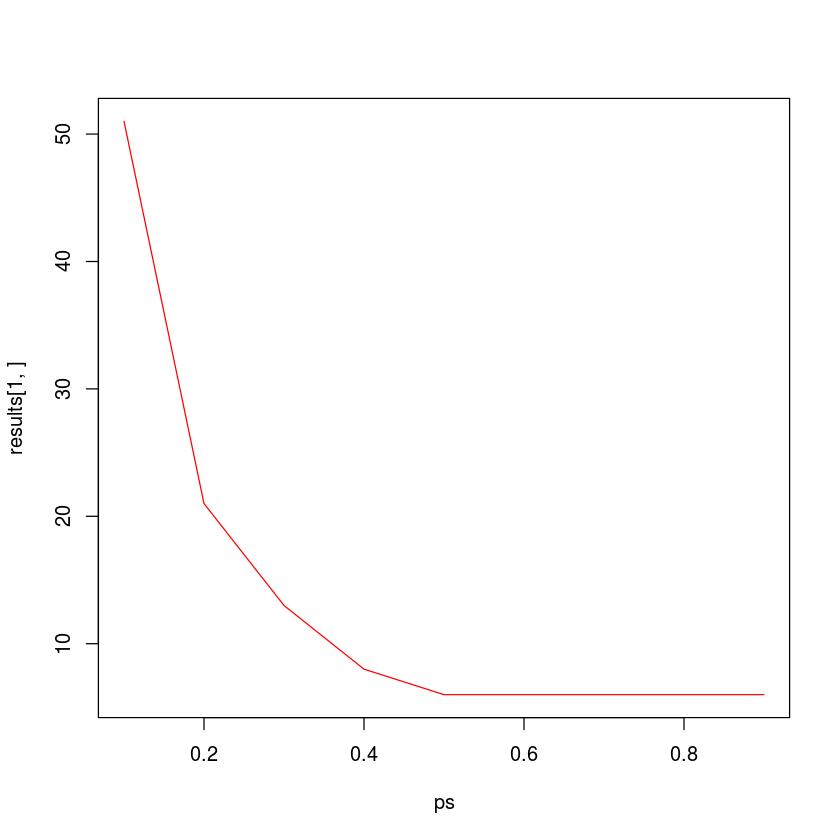

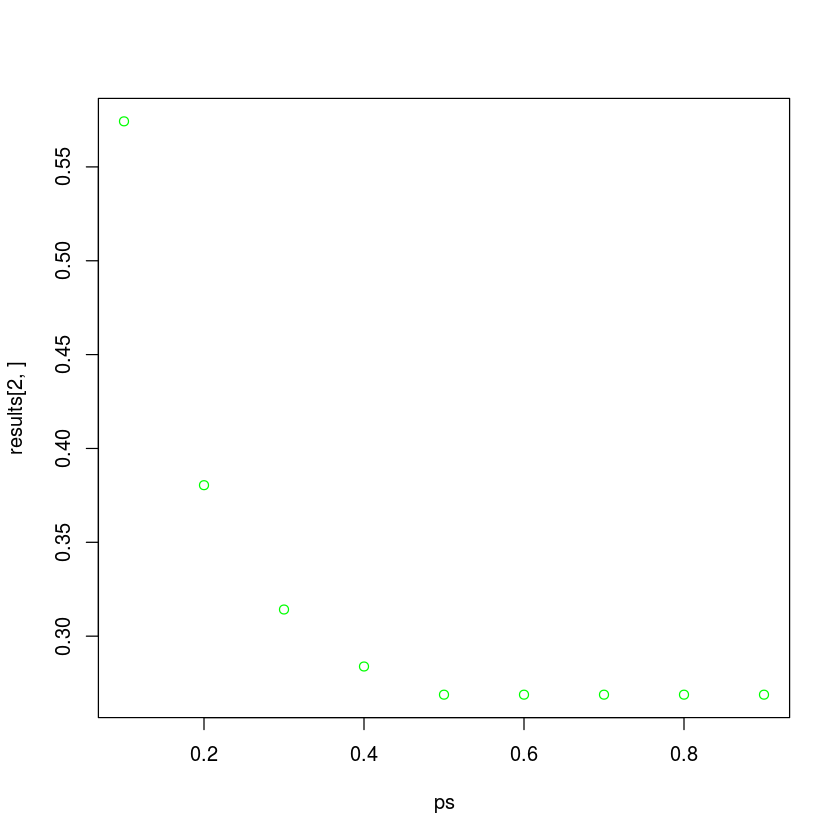

In [23]:
plot(ps,results[1,],type="l",col="red")
# par(new=TRUE)
plot(ps,results[2,],col="green", add=TRUE)

In [39]:
results[1,]

[[1]]
[1] 51

[[2]]
[1] 21

[[3]]
[1] 13

[[4]]
[1] 8

[[5]]
[1] 6

[[6]]
[1] 6

[[7]]
[1] 6

[[8]]
[1] 6

[[9]]
[1] 6

In [40]:
results[2,]

[[1]]
[1] 0.5742647

[[2]]
[1] 0.3804392

[[3]]
[1] 0.3142126

[[4]]
[1] 0.2838531

[[5]]
[1] 0.2688475

[[6]]
[1] 0.2688475

[[7]]
[1] 0.2688475

[[8]]
[1] 0.2688475

[[9]]
[1] 0.2688475

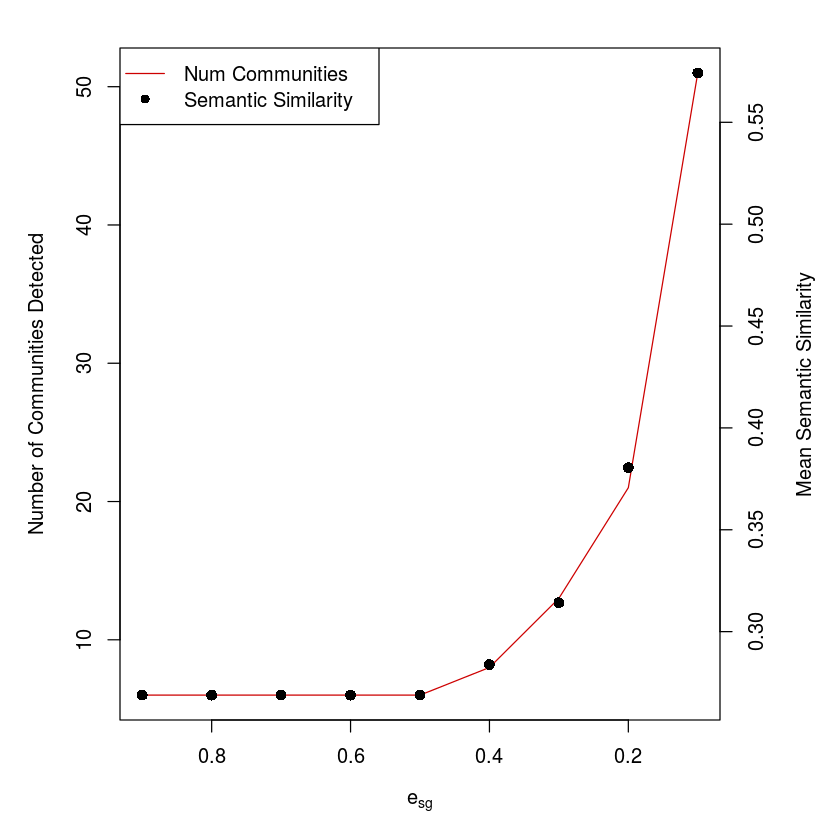

In [38]:
par(mar = c(5,5,2,5))
plot(ps, results[1,], type="l", col="red3", xlab=expression(e[sg]), xlim=c(0.9,0.1),
     ylab = "Number of Communities Detected")

par(new = TRUE)
plot(ps, results[2,], pch=16, xlim=c(0.9,0.1), axes=FALSE, xlab=NA, ylab=NA, cex=1.2)
axis(side = 4)
mtext(side = 4, line = 3, 'Mean Semantic Similarity')
legend("topleft",
       legend=c("Num Communities", "Semantic Similarity"),
       lty=c(1,0), pch=c(NA, 16), col=c("red3", "black"))